In [ ]:
#mengubah akses file kaggle
! chmod 600 /content/kaggle.json

In [ ]:
#import dataset
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d andrewmvd/animal-faces

 98% 685M/696M [00:09<00:00, 89.1MB/s]
100% 696M/696M [00:09<00:00, 76.1MB/s]


In [ ]:
#ekstrak file
import zipfile
zip_file = zipfile.ZipFile('/content/animal-faces.zip')
zip_file.extractall('/tmp/')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#upload image
path = '/tmp/afhq/train'

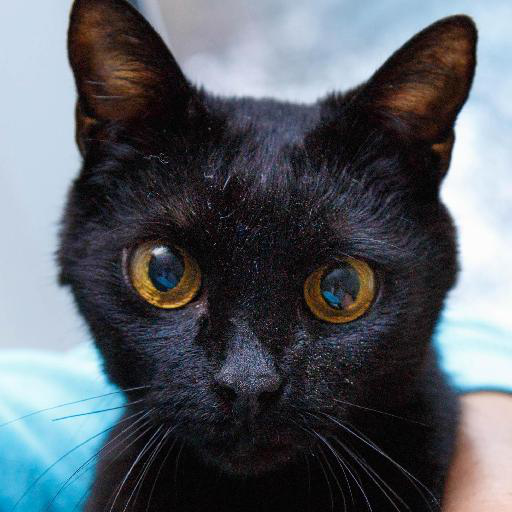

In [ ]:
#upload image
tf.keras.preprocessing.image.load_img('/tmp/afhq/train/cat/flickr_cat_000013.jpg')

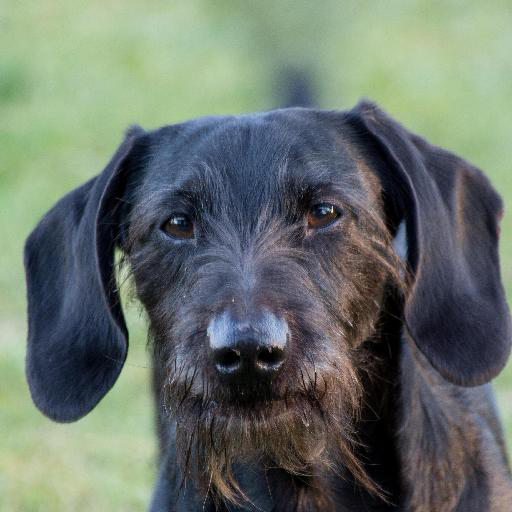

In [ ]:
#upload image
tf.keras.preprocessing.image.load_img('/tmp/afhq/train/dog/flickr_dog_000015.jpg')

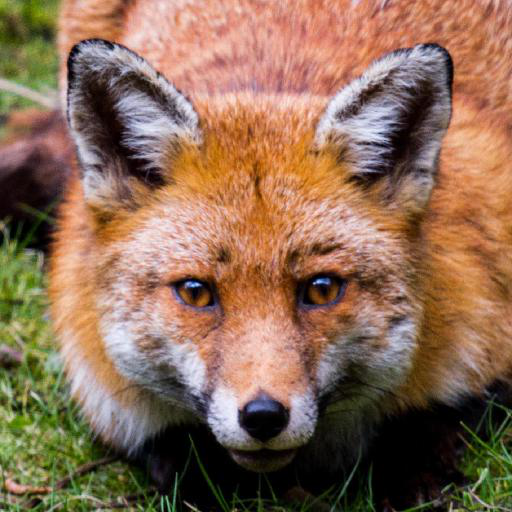

In [ ]:
#upload image
tf.keras.preprocessing.image.load_img('/tmp/afhq/train/wild/flickr_wild_000019.jpg')

In [ ]:
#membuat training
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('/tmp/afhq/train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [ ]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
training_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/tmp/afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


In [ ]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 7317)              4

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historic = network.fit(training_dataset, epochs=20)

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
forecasts = network.predict(test_dataset)
forecasts

1500/1500 [==============================] - 43s 29ms/step


array([[1.0000000e+00, 2.5977515e-24, 1.2746008e-24],
       [1.0000000e+00, 4.4228313e-19, 3.3866354e-23],
       [1.0000000e+00, 4.1552113e-09, 1.0481321e-09],
       ...,
       [4.6449403e-14, 3.1293542e-16, 1.0000000e+00],
       [4.6154332e-26, 4.6534382e-28, 1.0000000e+00],
       [8.9702124e-10, 4.9284415e-10, 1.0000000e+00]], dtype=float32)

In [ ]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.964

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[491,   4,   5],
       [ 13, 467,  20],
       [  5,   7, 488]])

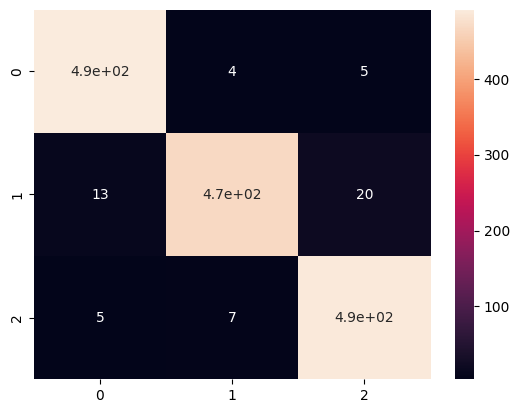

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.93      0.96       500
           2       0.95      0.98      0.96       500

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
#contoh klasifikasi gambar

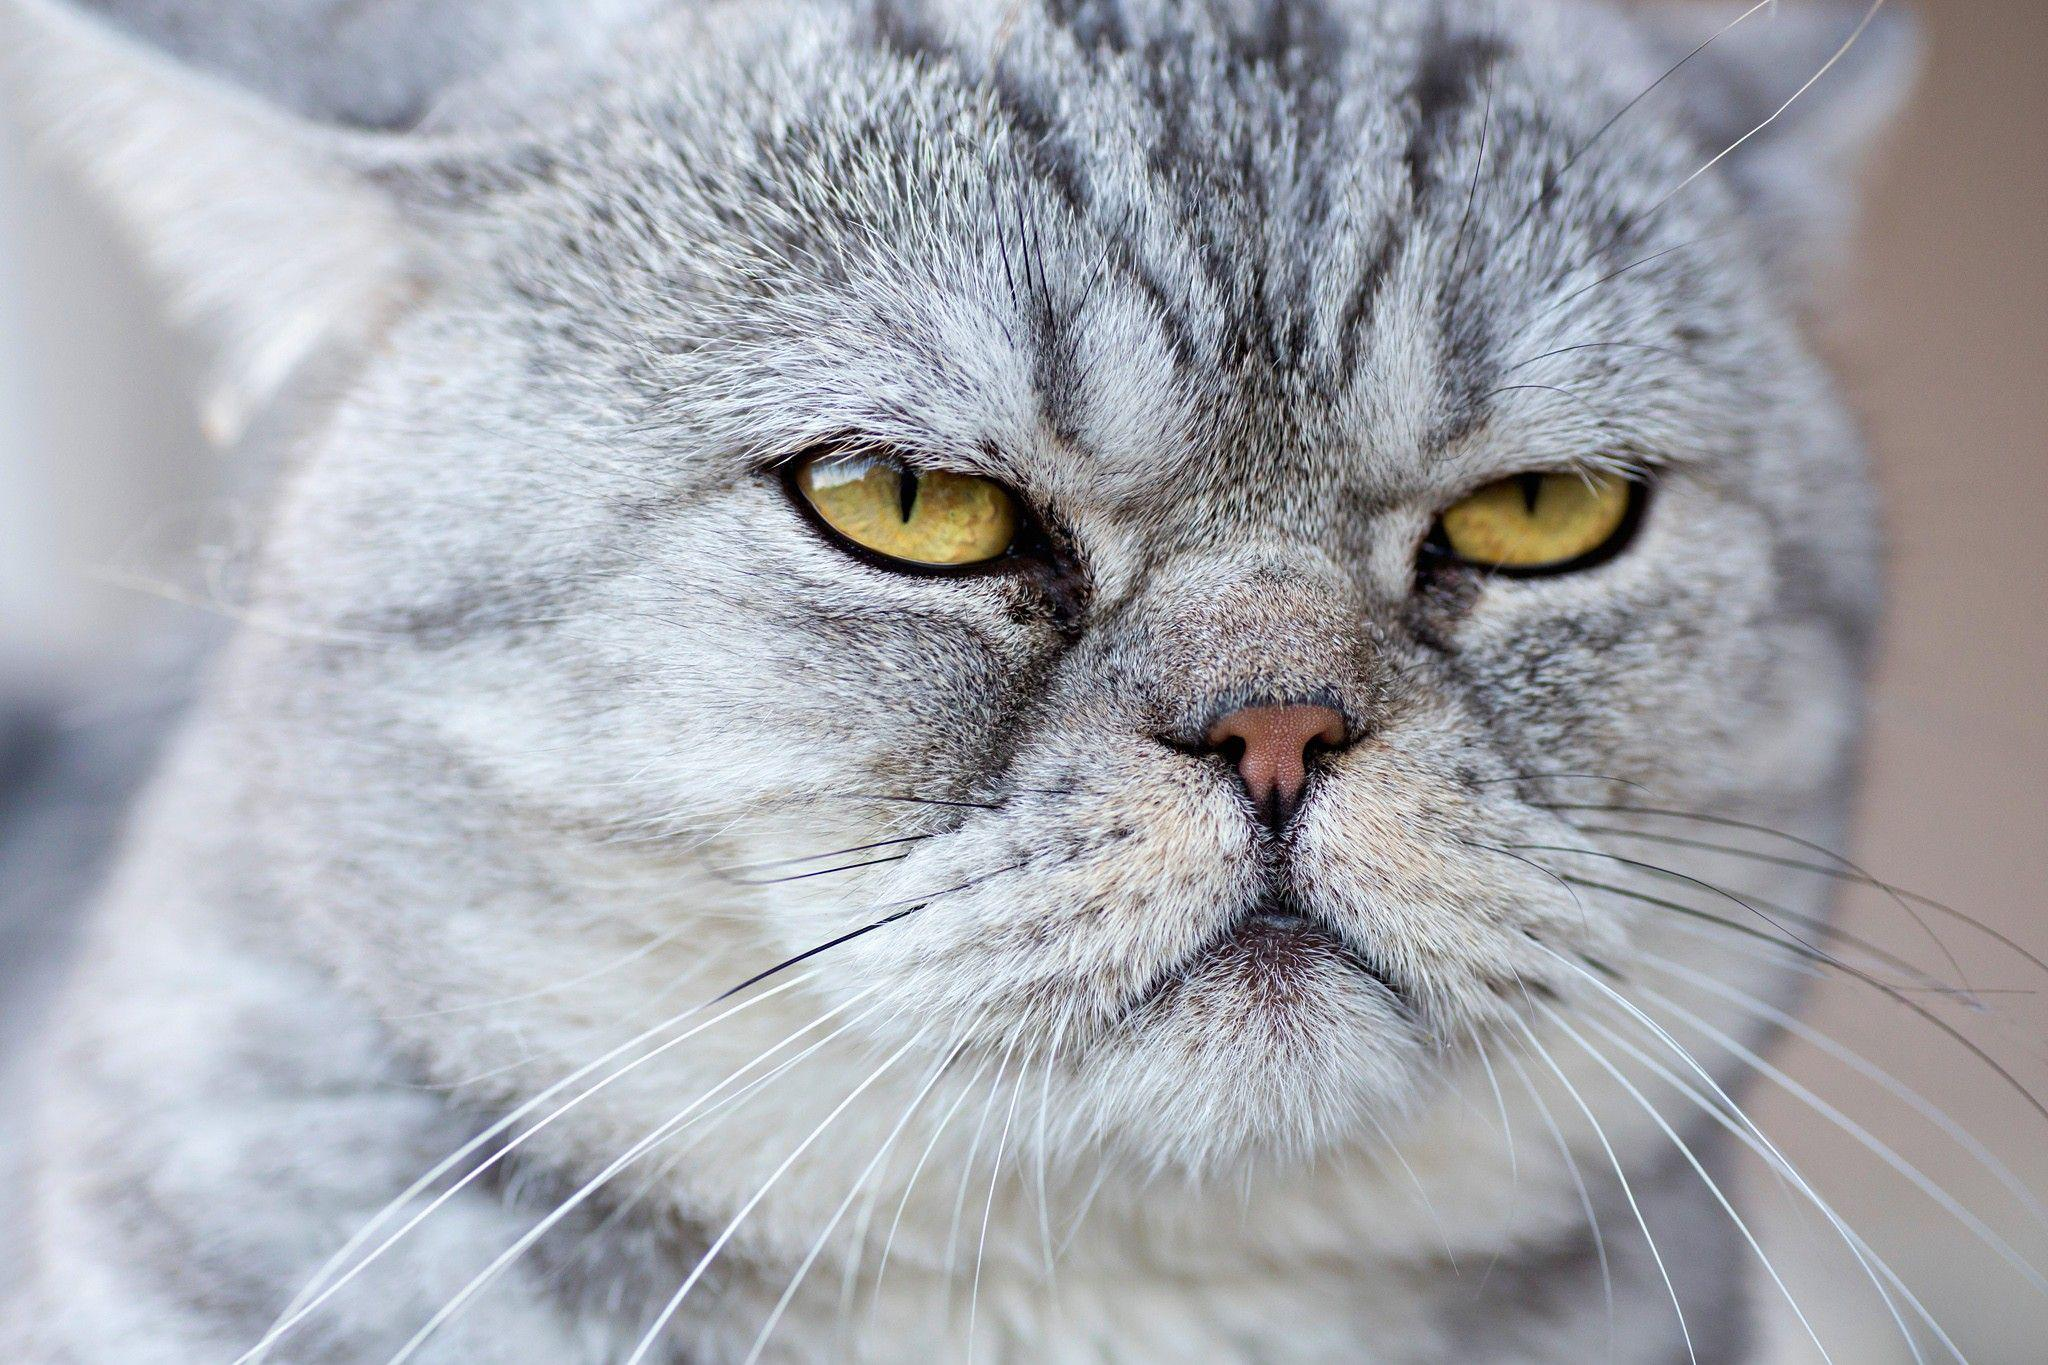

In [ ]:
import requests
url = "https://static.nationalgeographic.es/files/styles/image_3200/public/75552.ngsversion.1422285553360.jpg"
response = requests.get(url)

from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(response.content))
image.save('../animal.jpg')

image = cv2.imread('../animal.jpg')
cv2_imshow(image)

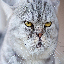

In [ ]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [ ]:
image = image / 255
image

array([[[0.80392157, 0.79215686, 0.77254902],
        [0.90980392, 0.86666667, 0.84705882],
        [0.78823529, 0.74117647, 0.67843137],
        ...,
        [0.38039216, 0.41176471, 0.47843137],
        [0.37254902, 0.40392157, 0.47058824],
        [0.36470588, 0.39607843, 0.4627451 ]],

       [[0.82745098, 0.78431373, 0.78431373],
        [0.85882353, 0.83529412, 0.80784314],
        [0.90980392, 0.86666667, 0.84705882],
        ...,
        [0.37647059, 0.40784314, 0.47843137],
        [0.37647059, 0.40784314, 0.47843137],
        [0.36470588, 0.39215686, 0.4627451 ]],

       [[0.81568627, 0.78431373, 0.76470588],
        [0.84705882, 0.80784314, 0.80392157],
        [0.89411765, 0.85490196, 0.84705882],
        ...,
        [0.4       , 0.41568627, 0.49411765],
        [0.39607843, 0.42745098, 0.48627451],
        [0.38823529, 0.41960784, 0.4745098 ]],

       ...,

       [[0.85882353, 0.81176471, 0.81568627],
        [0.85882353, 0.81960784, 0.8       ],
        [0.92156863, 0

In [ ]:
image.shape

(64, 64, 3)

In [ ]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [ ]:
result = network(image)
result

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[9.7704643e-01, 1.9307743e-05, 2.2934176e-02]], dtype=float32)>

In [ ]:
result = np.argmax(result)
result

0

In [37]:
if result == 0:
  print('Cat')
else:
 if result == 1:
    print('Dog')
 else:
    print('Wild')

Cat
